# `trim_disconnected_voxels`
``trim_disconnected_voxels`` is a function which removes blobs that are not connected to specified inlets.  Blobs are any clusters of ``True`` voxels, so this can be used to analyze both solid or void phase by inverting the image as needed.

In [5]:
import matplotlib.pyplot as plt

import porespy as ps

ps.visualization.set_mpl_style()

##  `im` and `inlets`
The image contains ``True`` values indicating the phase of interest.  `inlets` can be custom created to indicate which blobs to trim.

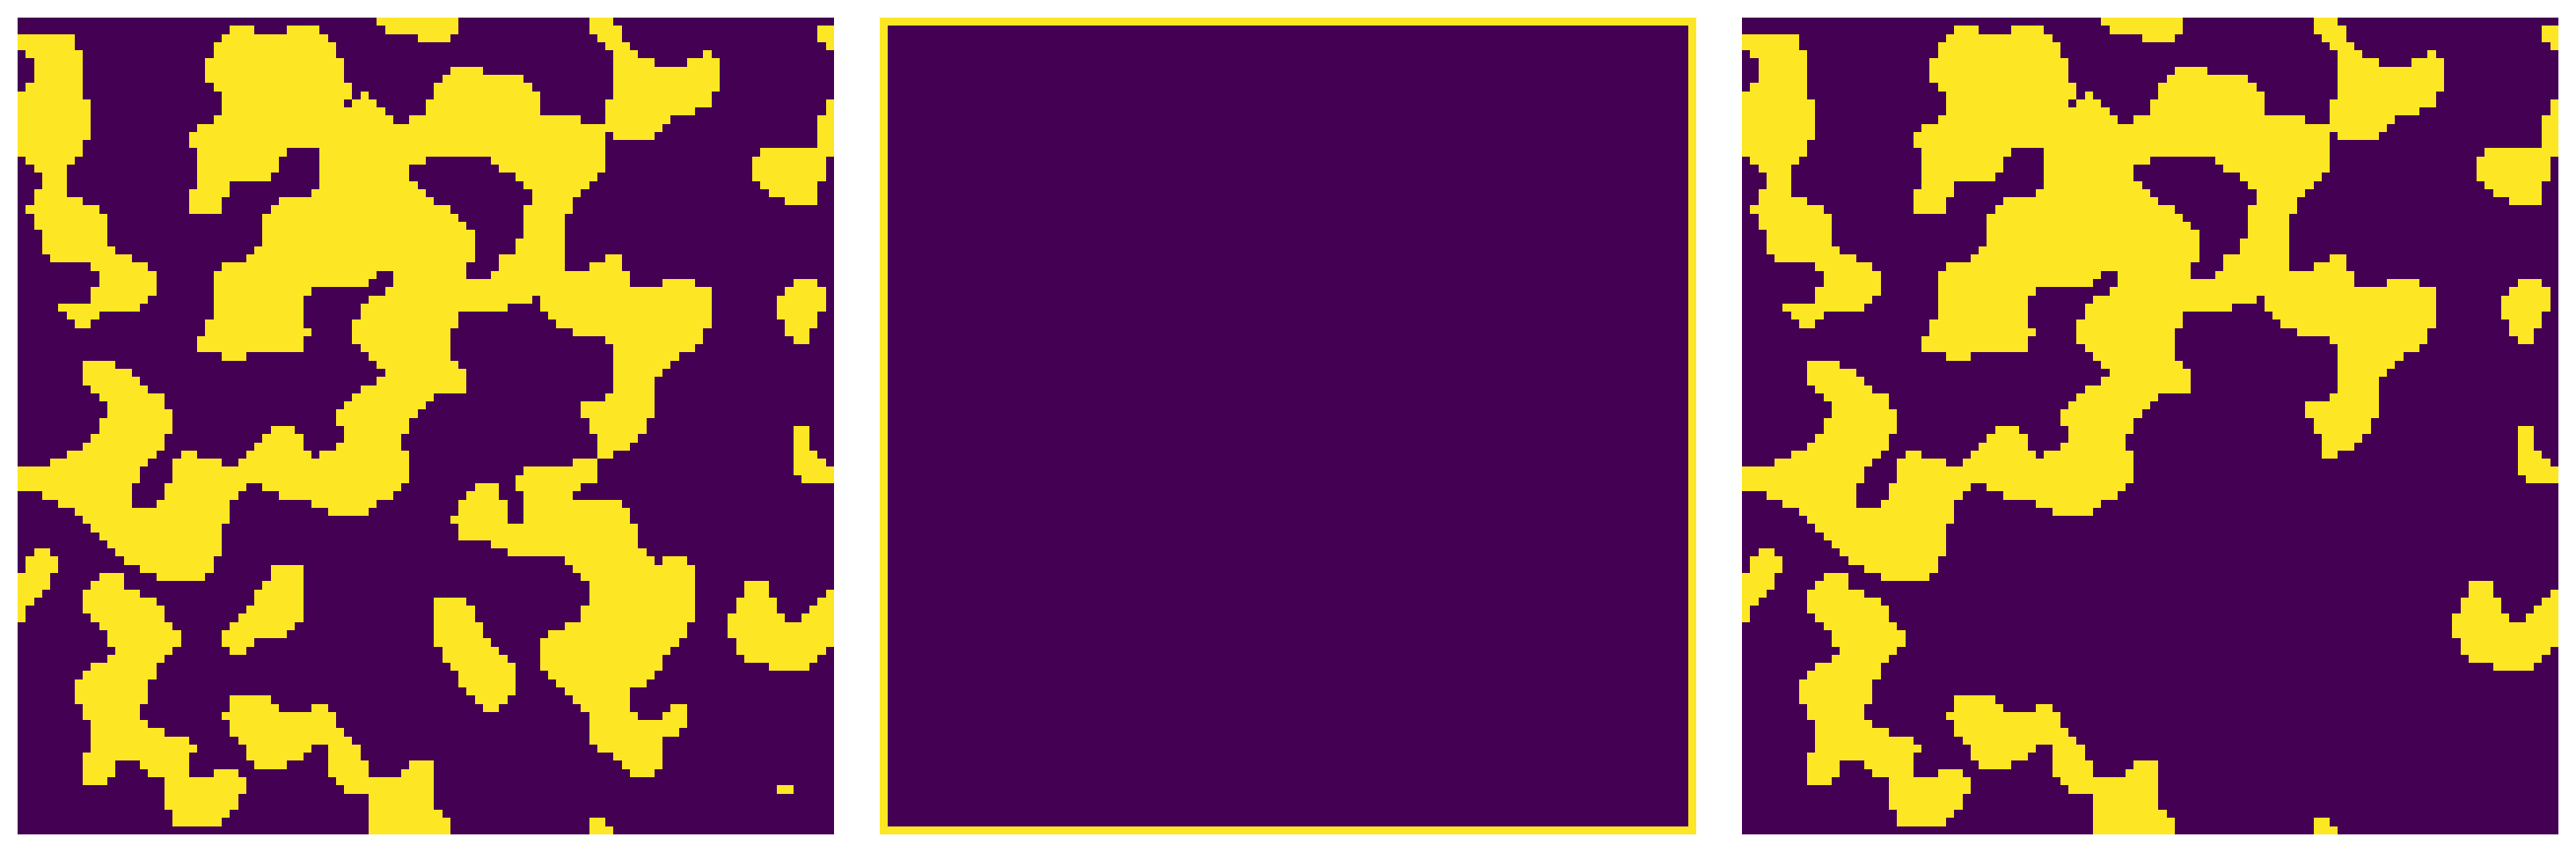

In [14]:
im = ps.generators.blobs(shape=[100, 100], porosity=0.38, seed=1)
inlets = ps.generators.borders(shape=im.shape, mode='faces')
im2 = ps.filters.trim_disconnected_voxels(im, inlets)

fig, ax = plt.subplots(1, 3, figsize=[15, 5])
ax[0].imshow(im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(inlets, origin='lower', interpolation='none')
ax[1].axis(False)
ax[2].imshow(im2, origin='lower', interpolation='none')
ax[2].axis(False);

## `conn`
Controls how 'connected' a group of voxels must be.  The options are `'min'` which means voxels are only considered connected if they share a face, and `'max'` which means voxels are connected if they share a face, edge or corner. 

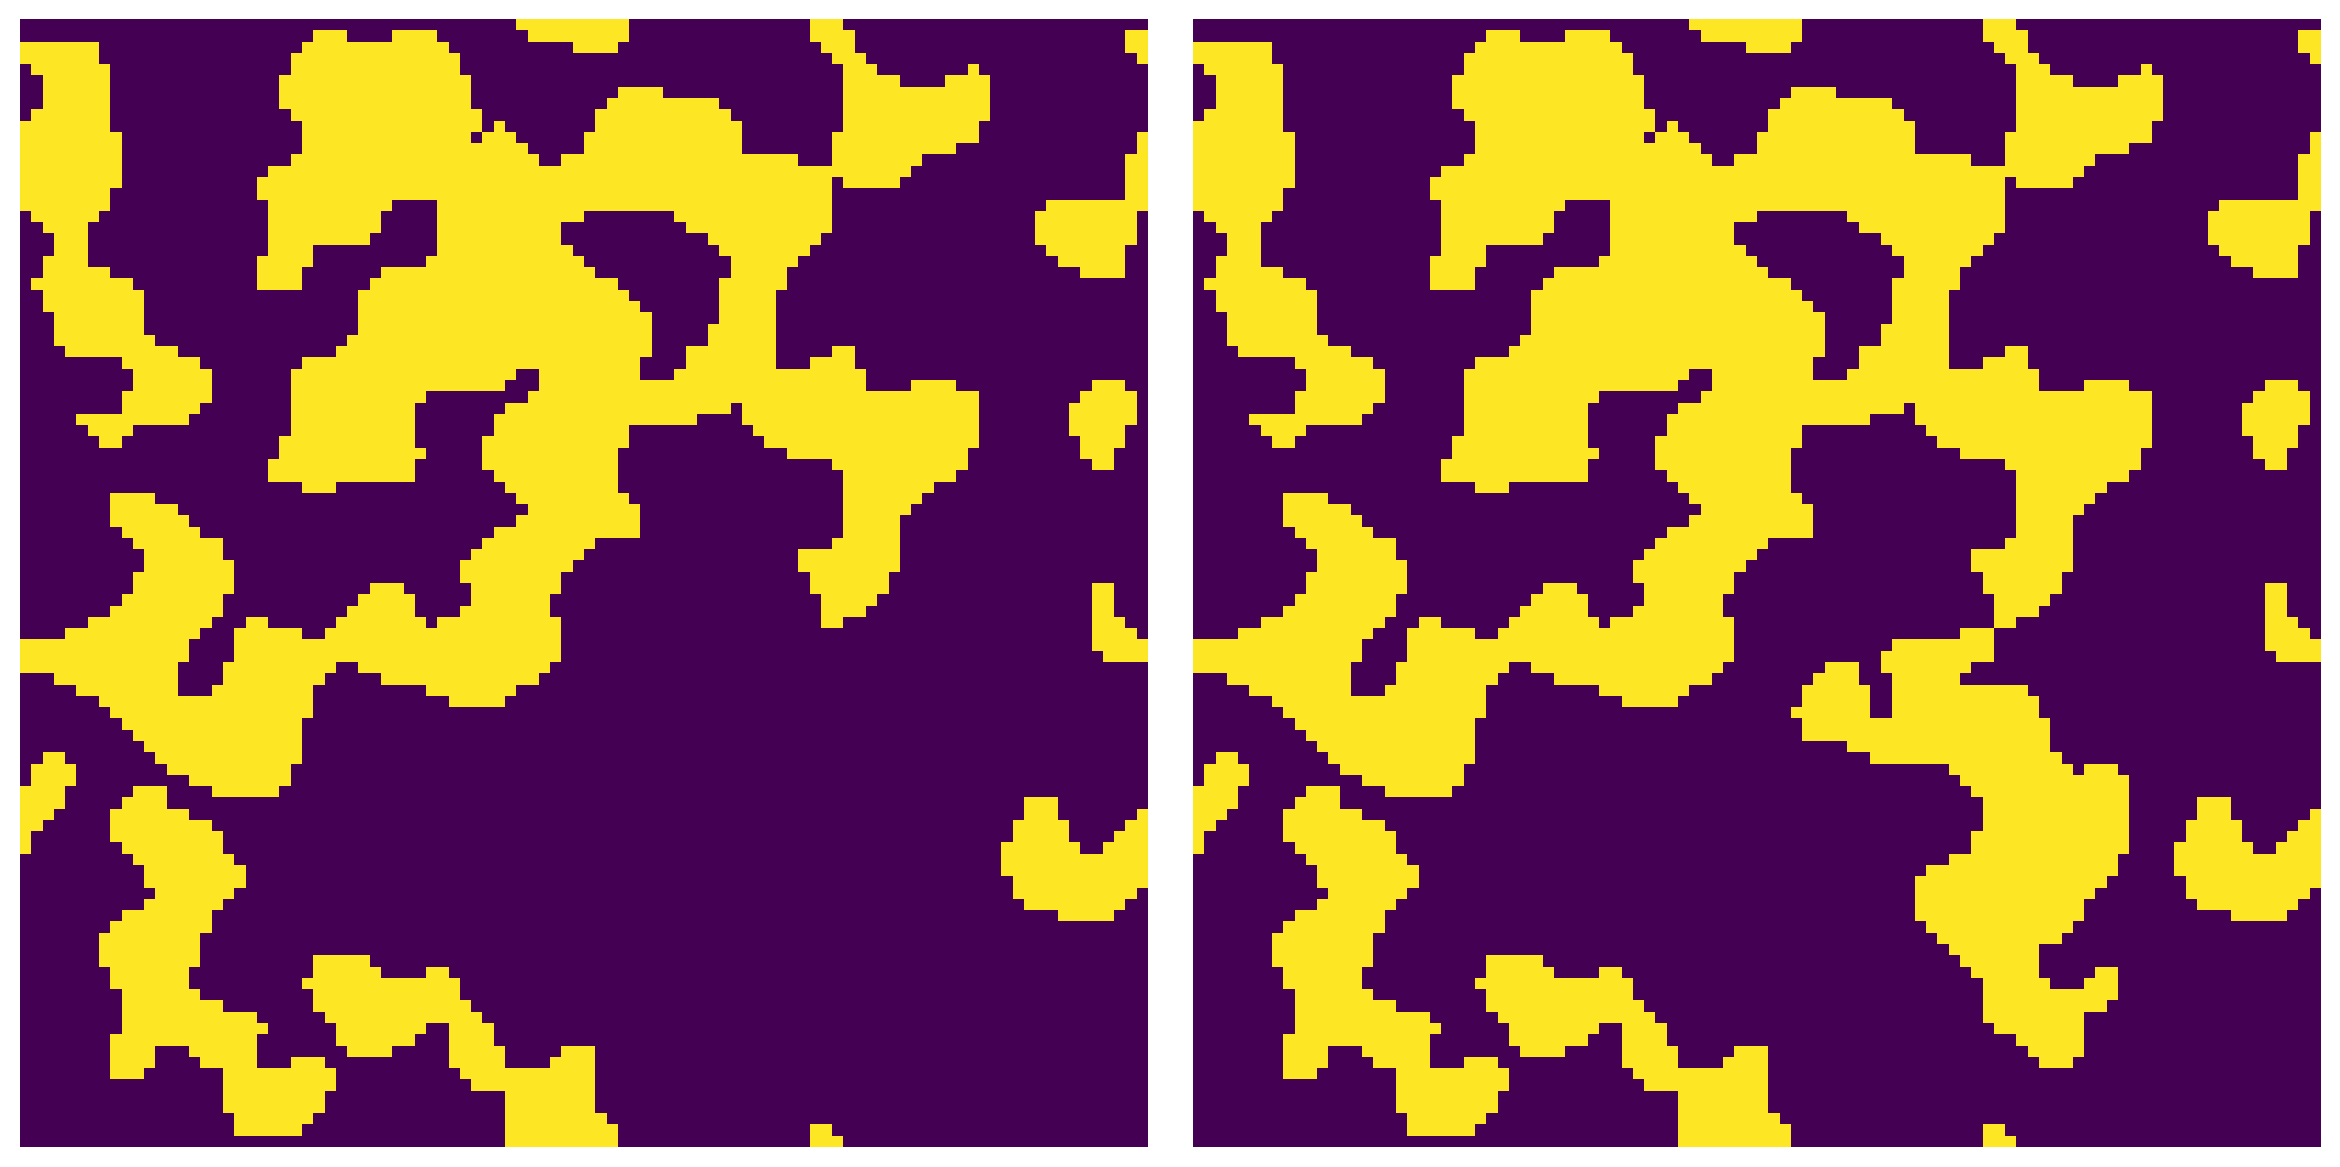

In [15]:
im1 = ps.filters.trim_disconnected_voxels(im, inlets, conn="min")
im2 = ps.filters.trim_disconnected_voxels(im, inlets, conn="max")

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False);